In [1]:
from tensorflow import keras
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from pathlib import Path
from tensorflow.keras import layers, models
import tensorflow as tf

In [2]:
main_path = 'insects/'

path_butterfly = main_path+'Butterfly/'
path_drangonfly = main_path+'Dragonfly/'
path_grasshopper = main_path+'Grasshopper/'
path_ladybug = main_path+'Ladybird/'
path_mosquito = main_path+'Mosquito/'
img_height = 150
img_width = 150

In [3]:
def load_data(path):
    data = []
    pathlist = Path(path).rglob('*.jpg')
    #num_img = 0
    for i in pathlist:
        
        path_in_str = str(i)
        
        img = Image.open(path_in_str)
        
        img_resized = img.resize((img_height, img_width), resample=Image.BILINEAR)
        
        img_resized = np.array(img_resized)
        if(img_resized.shape != (img_height, img_width, 3)):
            if img_resized.shape == (img_height, img_width):
                #print("converting gray image to rgb...")
                img_resized = np.stack((img_resized,) * 3, axis=-1)
            
        #img_resized = img_resized/255.0
        #print(img_resized[0, :])

        #print("image : ",path_in_str)
        data.append(np.array(img_resized))
            
            
    return data

In [4]:
data_butterfly = load_data(path_butterfly)


data_drangonfly = load_data(path_drangonfly)
data_grasshopper = load_data(path_grasshopper)
data_ladybug = load_data(path_ladybug)
data_mosquito = load_data(path_mosquito)

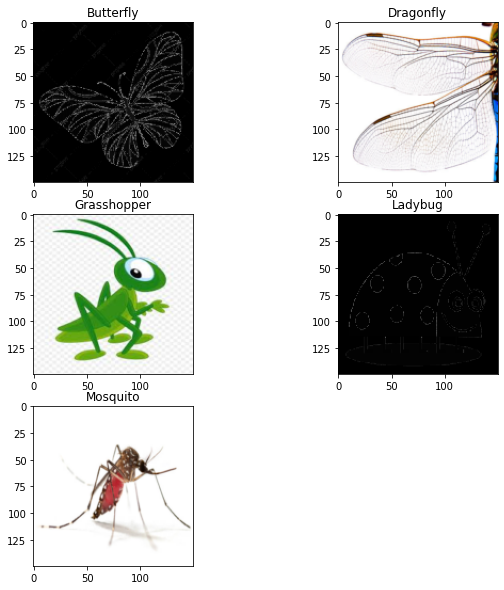

In [5]:

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 10)
axs[0, 0].imshow(data_butterfly[random.randint(0, len(data_butterfly))])
axs[0, 0].title.set_text('Butterfly')
axs[0, 1].imshow(data_drangonfly[random.randint(0, len(data_drangonfly))])
axs[0, 1].title.set_text('Dragonfly')
axs[1, 0].imshow(data_grasshopper[random.randint(0, len(data_grasshopper))])
axs[1, 0].title.set_text('Grasshopper')
axs[1, 1].imshow(data_ladybug[random.randint(0, len(data_ladybug))])
axs[1, 1].title.set_text('Ladybug')
axs[2, 0].imshow(data_mosquito[random.randint(0, len(data_mosquito))])
axs[2, 0].title.set_text('Mosquito')
fig.delaxes(axs[2,1])
plt.show()


In [6]:
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(5)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

2023-09-10 12:49:45.668636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
data_butterfly = np.array(data_butterfly)
data_drangonfly = np.array(data_drangonfly)
data_grasshopper = np.array(data_grasshopper)
data_ladybug = np.array(data_ladybug)
data_mosquito = np.array(data_mosquito)

print(data_butterfly.shape)
print(data_drangonfly.shape)
print(data_grasshopper.shape)
print(data_ladybug.shape)
print(data_mosquito.shape)

(899, 150, 150, 3)
(1036, 150, 150, 3)
(960, 150, 150, 3)
(864, 150, 150, 3)
(690, 150, 150, 3)


In [8]:
y_data  = np.concatenate((np.zeros(len(data_butterfly)), np.ones(len(data_drangonfly)), np.ones(len(data_grasshopper))*2, np.ones(len(data_ladybug))*3, np.ones(len(data_mosquito))*4))
x_data = np.concatenate((data_butterfly, data_drangonfly, data_grasshopper, data_ladybug, data_mosquito))
X_train, X_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.30, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, shuffle=True)

In [9]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=40, 
                    validation_data=(X_val, y_val))

Epoch 1/40
98/98 [==============================] - 26s 259ms/step - loss: 1.7441 - accuracy: 0.2213 - val_loss: 1.6047 - val_accuracy: 0.2309
Epoch 2/40
98/98 [==============================] - 25s 251ms/step - loss: 1.5945 - accuracy: 0.2238 - val_loss: 1.5878 - val_accuracy: 0.2249
Epoch 3/40
98/98 [==============================] - 23s 233ms/step - loss: 1.5533 - accuracy: 0.2765 - val_loss: 1.4893 - val_accuracy: 0.3358
Epoch 4/40
98/98 [==============================] - 23s 231ms/step - loss: 1.5140 - accuracy: 0.3189 - val_loss: 1.4660 - val_accuracy: 0.3793
Epoch 5/40
98/98 [==============================] - 22s 229ms/step - loss: 1.4213 - accuracy: 0.3886 - val_loss: 1.3403 - val_accuracy: 0.4948
Epoch 6/40
98/98 [==============================] - 23s 230ms/step - loss: 1.3259 - accuracy: 0.4496 - val_loss: 1.2958 - val_accuracy: 0.5097
Epoch 7/40
98/98 [==============================] - 23s 231ms/step - loss: 1.2690 - accuracy: 0.4820 - val_loss: 1.2453 - val_accuracy: 0.4798

21/21 - 1s - loss: 1.2908 - accuracy: 0.6198 - 975ms/epoch - 46ms/step


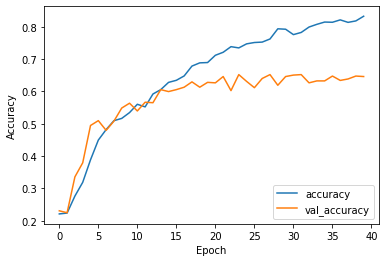

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [2]:


test_index = random.randint(0, len(X_test)-1)

def plot_value_array(i, predictions_array, true_label):
    true_label = int(true_label[i])
    print(true_label)
    plt.grid(False)
    plt.xticks(range(len(predictions_array)))
    
    thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
    #plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')




img = X_test[test_index]
predictions_single = model.predict(img.reshape(1, img_height, img_width, 3))
predictions_single = tf.nn.softmax(predictions_single)
print(predictions_single)


class_names = ['Butterfly', 'Dragonfly', 'Grasshopper', 'Ladybird', 'Mosquito']
test_labels = y_test
plot_value_array(test_index, predictions_single[0], test_labels)
_ = plt.xticks(range(5), class_names, rotation=45)
plt.grid()
plt.ylabel("probabilities")
plt.show()
plt.imshow(img)
plt.show()

NameError: name 'random' is not defined